# Naive Bayes homework with Yelp review text

## Task 1

Read `yelp.csv` into a DataFrame.

In [2]:
# access yelp.csv in your data directory and load it into a DataFrame
import pandas as pd
yelp_df = pd.read_table('/Users/Matt/githubclones/ga-sea-dat1/data/yelp.csv', sep=',')
yelp_df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


## Task 2

Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [4]:
# filter the DataFrame to only rows that have a 5-star or 1-star rating. Using an OR condition
yelp_extremes = yelp_df[(yelp_df.stars == 5)|(yelp_df.stars == 1)]

## Task 3

Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [7]:
# define X and y
from sklearn.cross_validation import train_test_split
X = yelp_extremes.text
y = yelp_extremes.stars




In [8]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Task 4

Use CountVectorizer to create document-term matrices from X_train and X_test.

In [9]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()


In [10]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

X_train_tokens = vect.get_feature_names()
print X_train_tokens[-50:]

[u'yyyyy', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


## Task 5

Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [11]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [13]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


## Task 6

Calculate the AUC.

In [14]:
# y_test contains fives and ones, which will confuse the roc_auc_score function
y_test[:10].values
y_test.shape

(1022L,)

In [5]:
# create y_test_binary, which contains ones and zeros instead
'''this way trips an error:
mapping = pd.Series({1:0,5:1})
y_test_binary = y_test.map(mapping)
y_test_binary[:10]'''

'''try this instead, also trips error
y_test['y_test_binary'] = y_test.map({1:0, 5:1})

There should be a way to simply remap, but I can't find it, so I will restart at step 3:'''
yelp_extremes['binary_stars'] = yelp_extremes.stars.map({1:0, 5:1})
print(yelp_extremes)

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8v1g  2010-01-11  cGnKNX3I9rthE0-TH24-qA      5   
17    O510Re68mOy9dU490JTKCg  2010-05-03  j4SIzrIy0WrmW4yr4--Khg      5   
21    tdcjXyFLMKAsvRhURNOkCg  2011-06-28  LmuKVFh03Uz318VKnUWrxA      5   
22    eFA9dqXT5EA_TrMgbo03QQ  2011-07-13  CQYc8hgKxV4enApDkx0IhA      5   
23    IJ0o6b8bJFAbG6MjGfB

C:\Users\Matt\Anaconda\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
#rerun the model fitting steps with new binary column "binary_stars" as the y:
X = yelp_extremes.text
y = yelp_extremes.binary_stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print metrics.accuracy_score(y_test, y_pred_class)
#gets same accuracy score, so I managed not to screw it up

0.918786692759


In [25]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  1.00000000e+00,   9.99759874e-01,   1.00000000e+00, ...,
         1.00000000e+00,   1.05200807e-19,   9.99915316e-01])

In [26]:
# calculate the AUC using y_test_binary and y_pred_prob
'''note that here y_test is based on binary star values from the ground up
(see comment at task 6),so the variable name isn't changed below'''
print metrics.roc_auc_score(y_test, y_pred_prob)

0.940353585141


## Task 7

Plot the ROC curve.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

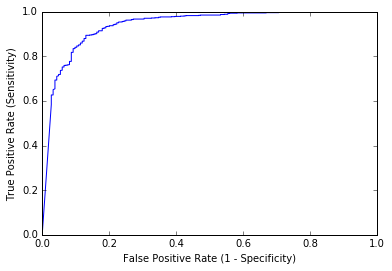

In [50]:
# plot ROC curve using y_test_binary and y_pred_prob
'''note that here y_test is based on binary star values from the ground up
(see comment at task 6),so the variable name isn't changed below'''

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## Task 8

Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [28]:
# print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[126  58]
 [ 25 813]]


In [29]:
# calculate sensitivity
print 813/float(813+25)

0.970167064439


In [30]:
# calculate specificity
print 126/float(126+58)

0.684782608696


The model is having a much easier time detecting five-star reviews than one-star reviews.

## Task 9

Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [31]:
# print message text for the false positives
X_test[y_test < y_pred_class]


2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\r\nI brought my Mountain Bike in ...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
1721    This is the closest to a New York hipster styl...
3447    If you want a school that cares more about you...
842     Boy is

In [32]:
X_test[7035]

'Totally excited to try this place out, my grandparents, my mom and I (4 of us) came here for some Korean food. It wasn\'t too busy; just pairs of people from nearby offices coming in and out. \r\n\r\nUnlike other Korean restaurants, their lunch special selection is very limited. Special A  consists of a sushi roll with a soda, special B = teriyaki beef/chicken (no soda), or special C, Korean BBQ Spicy Chicken. \r\n\r\nAs we were looking at the "lunch special" board, the lady behind the counter insisted that we should look at their full price menu instead. Here comes the awkward part: she then asked my mom "are you Chinese?" Even though she is, my mum looked at me all puzzled as in "what does that mean?" The lady proceeded by pointing at the "seafood pancake" section on the menu and saying "I don\'t know why but you Chinese like this pancake a lot." Good thing my mom didn\'t hear what she said.. or else... \r\n\r\nSo we got the Spicy Chicken lunch special ($6.99), a bulgogi ($6.99), an

In [33]:
#false negatives
X_test[y_test > y_pred_class]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

In [38]:
X_test[5736]

"Thank goodness for Sue at Mill Avenue Travel. We contacted Sue to book our honeymoon trip to St. Lucia at one of the Sandals resort.  She was great with setting everything up, booking airfare etc.  When our original airfare decided to cancel the flight, she made sure we had a comparable one booked.  The best thing she did for us was encourage us to purchase travel insurance.  \r\n\r\nWhen we arrived at our Miami hotel at 10:30pm the night prior to leaving for St. Lucia, we had discovered Sue had left us an urgent note to contact her.  We found out a hurricane had hit St. Lucia and all of a sudden our honeymoon plans starting crumbling apart.  Because of Sue and our travel insurance (thank goodness we listened to the expert on this one!), we were able to change our honeymoon to a Sandals resort in the Bahamas and didn't miss a beat.  Sue was in constant contact with us, which calmed the craziness I was feeling (and I'm sure my new husband was relieved).  The airlines even took care of 

I can see how the false positives and false negatives resulted. Many of the false postives involved sarcasm. And many of the false negatives involved stories that had negative words used to mention a situation - like having a bad day made better by the restaurant server, or the travel agent who helped the reviewer work through a bad situation. The false positives had a lot of words associated with positive sentiment that would have shown up in true positives. Likewise, the false negatives had a lot of words that would have shown up in true negative reviews, though in a different context (talking about the situation rather than the business).

## Task 10

Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

In [39]:
# create a list that will store the results of the process below


# loop through the thresholds returned by the metrics.roc_curve function
thresholds = metrics.roc_curve(y_test, y_pred_prob)

In [ ]:
# locate the minimum difference (at which sensitivity and specificity are balanced)
'''I can't figure out how to do this.'''

## Task 11

Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:

- Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
- Split the data into training and testing sets.
- Calculate the testing accuracy of a Naive Bayes model.
- Compare the testing accuracy with the null accuracy.
- Print the confusion matrix.
- Comment on the results.

In [41]:
# define X and y using the original DataFrame
from sklearn.cross_validation import train_test_split
X = yelp_df.text
y = yelp_df.stars


In [42]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [43]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)


In [44]:
# fit a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)


In [46]:
# calculate the testing accuary
print metrics.accuracy_score(y_test, y_pred_class)

0.4712


In [47]:
# calculate the null accuracy
y_test.value_counts().head(1) / len(y_test)

4    0.3536
Name: stars, dtype: float64

In [48]:
# print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[ 55  14  24  65  27]
 [ 28  16  41 122  27]
 [  5   7  35 281  37]
 [  7   0  16 629 232]
 [  6   4   6 373 443]]


Comments:
Since this not predicting a binary class membership relationship,it's hard to interpret the confusion matrix and results. While it was intuitive and understandable to do this when we were working with the highest and lowest ends of the spectrum, even with dummy values I can't figure out how to make this work, other than classes of "5 star" and "not 5 star".

